## Iris Dataset

이번 실습은 붓꽃(iris, 아이리스) 데이터를 활용하여 붓꽃의 세부 종류를 구분하는 문제를 풉니다.

붓꽃의 종류는 크게 **3가지**, **iris setosa** / **iris versicolor** / **iris virginica**가 존재하며, 주어진 꽃잎과 꽃받침의 길이와 너비를 활용해 해당 꽃의 종류를 맞추는 알고리즘을 Single-layer Neural Network로 해결하면 됩니다.

각 컬럼에 대한 설명은 다음과 같습니다. 출처: [ai-times](http://ai-times.tistory.com/418)

  * **sepal length (cm)**: 꽃받침의 길이
  * **sepal width (cm)**: 꽃받침의 너비
  * **petal length (cm)**: 꽃잎의 길이
  * **petal width (cm)**: 꽃잎의 너비
  * **species**: 붓꽃의 종류. iris setosa(0) / iris versicolor(1) / iris virginica(2) 의 세 종류가 있다.

먼저 필요한 라이브러리들을 가져옵시다. 우선 Numpy가 필요합니다

In [1]:
import numpy as np

그 다음에는 데이터를 가져옵니다.  다행히도 scikit learn 내부에 iris 데이터를 가져올 수 있는 함수가 존재하니 이를 이용해서 데이터를 가져오겠습니다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

우리가 예측하는데 필요한 feature - 꽃잎/꽃받침의 길이와 너비는 iris 딕셔너리에 data라는 키로 저장되어 있습니다. 이를 따로 가져와 X라는 변수에 저장합니다.

In [3]:
X = iris["data"]

print(X.shape)
X[0:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

정답 - 3가지의 분류 중 어느 종에 속하는지에 대한 정보는 "target"(목표변수)이라는 키로 저장되어 있습니다. 마찬가지로 이를 따로 가져와 y라는 변수에 저장합니다.

In [4]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualize

본격적으로 과제를 시작하기에 앞서, 간단한 시각화를 통해 각 feature에 대한 정보를 알아봅시다.

In [5]:
import pandas as pd # 편의를 위해 Pandas를 사용하겠습니다.
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.DataFrame(X, columns=iris["feature_names"]) # X를 pandas 데이터 프레임 형태로 변환합니다.
data["species"] = y # 종에 대한 정보도 함께 저장합니다.

num_species = len(data["species"].unique()) # 총 몇 개의 종이 있는지 출력합니다.

print("The total number of species = {0}".format(num_species))

print(data.shape)
data.head()

The total number of species = 3
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


총 150개의 데이터를 갖고 있음을 확인할 수 있습니다. 또한 우리의 사전 정보대로 총 3개의 정답 레이블이 존재한다는 것도 확인할 수 있습니다.

#### Sepal

Sepal(꽃받침)의 너비와 길이 정보를 먼저 시각화해봅시다.

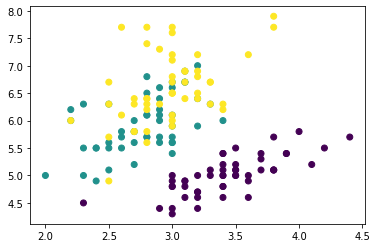

In [7]:
plt.scatter(data["sepal width (cm)"], data["sepal length (cm)"], c=data["species"])

#### Petal

이번에는 petal(꽃잎)의 너비와 길이를 시각화해봅시다

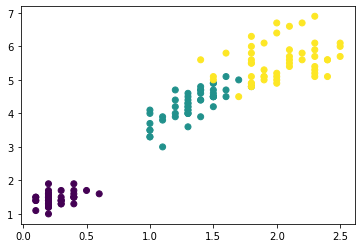

In [8]:
plt.scatter(data["petal width (cm)"], data["petal length (cm)"], c=data["species"])

### Preprocessing

본격적으로 학습을 시작하기 전에 간단한 전처리를 해주겠습니다. 현재 정답(y)는 0, 1, 2 세 가지의 값을 갖고 있습니다. 이를 One-hot encoding 하겠습니다. 이렇게 하면 y가 0일 때엔 \[1, 0, 0\], 1일 때엔 \[0, 1, 0\], 마지막으로 2일 때엔 \[0, 0, 1\]의 값을 갖게 됩니다. 곧 총 분류의 수만큼의 값들 중에서 자신이 해당하는 값만 1의 값을 가지고, 나머지는 0이라고 생각할 수 있습니다.

In [9]:
num_classes = len(np.unique(y)) # 총 범주의 수를 가져옵니다. 3이 될 것 입니다.

y_hot = np.eye(num_classes)[y]  # 이를 이용해 위의 설명처럼 one-hot encoding시켜줍니다.
y_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

확인해보면 값들이 적절하게 인코딩되어 있다는 것을 알 수 있습니다.

### Define Sigmoid

이번 과제에서도 저번과 마찬가지로 Sigmoid 함수를 이용하도록 하겠습니다. 0~1 사이의 값을 가지므로 확률을 표현하기에 적절한 함수입니다.

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

시그모이드 함수를 시각화해보면 아래와 같습니다. S자 형태로 0~1 사이의 값을 가진다는 것을 볼 수 있습니다.

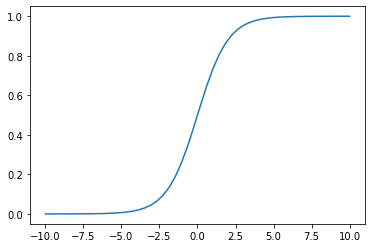

In [11]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

이제 본격적으로 학습을 진행하도록 하겠습니다. 우리가 최종적으로 예측해야하는 값들은 데이터가 3개의 분류 중 어디에 속할지를 예측하는 것입니다. 따라서 데이터가 3 종에 속할 확률을 예측하고, 예측한 값들 중 **가장 큰 값**을 모델이 내놓는 최종 출력으로 하겠습니다. **np.argmax**라는 함수를 이용하면 됩니다.

In [12]:
example = np.random.rand(5, 3)
print(example)

[[0.18254301 0.30921028 0.75770979]
 [0.18672387 0.38540988 0.63027937]
 [0.62339027 0.08809176 0.52119409]
 [0.32805738 0.47648294 0.27558758]
 [0.63697046 0.74928553 0.72419634]]


모델이 각각의 클래스에 속할 것이라 예측한 값이 위와 같다고 해봅시다. 여기에 argmax를 사용하면 아래와 같은 결과가 나옵니다.

In [13]:
np.argmax(example, axis=1)

array([2, 2, 0, 1, 1])

이를 example의 값들과 비교해보면, 가장 큰 값을 갖는 index를 저장하고 있다는 것을 확인할 수 있습니다. 모델이 정확하게 예측하고 있다면 argmax의 값과 실제 레이블이 동일한 값을 가질 것입니다. 이를 이용해 과제를 풀어주시면 됩니다. 이번에도 마찬가지로 정확도가 0.95에 도달했다면 학습을 종료합니다 

In [22]:
# 몇 번 반복할 지
num_epoch = 100

# 업데이트할 정도
learning_rate = 1.0

Xt = X.T

num_data = X.shape[1]

# 총 4개의 feature를 가지고 3개의 종에 속할 확률을 예측해야 합니다. 
w = np.random.uniform(low=-1.0, high=1.0, size=(3, 4))  
# size(class의 갯수, feature의 갯수) : feature의 갯수(꽃받침, 꽃잎의 너비와 길이)가 오른쪽, class의 갯수가 왼쪽.

# 각 3개 종에 대한 bias 값입니다.
b = np.random.uniform(low=-1.0, high=1.0, size=(3, 1))

for epoch in range(num_epoch):
    y_predict_hot = np.dot(w, Xt) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = np.argmax(y_predict_hot, axis = 0)
    
    accuracy = (y_predict == y).mean()
    
    if accuracy > 0.9:
        break
    
    if epoch % 10 == 0:    
        print(f"{epoch} accuracy = {accuracy:.6f}")
    
    w = w - learning_rate * np.dot((y_predict_hot - y_hot.T), X) / num_data  
    # dot product를 하면 시그마까지만 된것. 그래서 1/m을 적용하기 위해 num_data로 나눈다.
    b = b - learning_rate * (y_predict_hot - y_hot.T).mean(axis = 1, keepdims = True)
    # (3,)이런 모양이라 (3, 1)로 맞춰주기 위해 keepdims = True => 이렇게 안해주면 나중에 문제가 생길 수 있다.
    
print('---' * 10)
print(f"{epoch} accuracy = {accuracy:.6f}")

0 accuracy = 0.220000
10 accuracy = 0.473333
20 accuracy = 0.660000
30 accuracy = 0.673333
40 accuracy = 0.666667
------------------------------
48 accuracy = 0.953333


/Users/choehansol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


실제 학습한 결과를 비교해봅시다.

In [23]:
y_predict_hot = np.dot(w, Xt) + b
y_predict_hot = sigmoid(y_predict_hot)

y_predict = np.argmax(y_predict_hot, axis = 0) # 예측치를 만들고

result = pd.DataFrame(X, columns=iris["feature_names"]) # 이를 Pandas 데이터 프레임에 넣어줍니다.
result["species(actual)"] = y
result["species(predict)"] = y_predict

print(result.shape)
result#.head(10)

(150, 6)


/Users/choehansol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species(actual),species(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
